# Mobile Games - A/B Test
### Patrícia do Nascimento

<img src='cookiecats.jpg' style=width:400px; align='center'/>

# Table of Contents

[1. Basic infos](#1.-Basic-infos)

[2. Import libraries](#2.-Import-libraries)

[3. Load data](#3.-Load-data)

[4. Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))

[5. Analyzing player behavior](#5.-Analyzing-player-behavior)

[6. Finding](#6.-Finding)

## 1. Basic infos
[Return to Table of Contents](#Table-of-Contents)

**Summary:** This report presents my analysis on the A/B test of the mobile game Cookie Cats. Watch a [demo](https://www.youtube.com/watch?v=svRy7HOso3Y).

**Source:** https://www.kaggle.com/yufengsui/mobile-games-ab-testing

**Columns**

* _useridA_ Unique number that identifies each player.
* _versionWhether_ The player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
* _sum_gamerounds_ The number of game rounds played by the player during the first 14 days after install.
* _retention_1_ Did the player come back and play 1 day after installing?
* _retention_7_ Did the player come back and play 7 days after installing?


## 2. Import libraries
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd             
from statistics import mode     
import numpy as np              
from scipy import stats         
import seaborn as sns
import matplotlib.pyplot as plt 

#import warnings
#warnings.filterwarnings("ignore")

from pylab import rcParams
%matplotlib inline

## 3. Load data
[Return to Table of Contents](#Table-of-Contents)

In [2]:
# Download file
df = pd.read_csv('cookie_cats.csv')

## 4. Exploratory Data Analysis (EDA)
[Return to Table of Contents](#Table-of-Contents)

In [3]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
print('The dataframe has', df.shape[0],'rows and', df.shape[1], 'columns.')

The dataframe has 90189 rows and 5 columns.


In [6]:
# There is missing values in dataset?
df.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

There is no missing value in this dataset.

In [7]:
# Applying function only in numeric value - except 'userid'
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

50% of players complete about 16 rounds within the 14-day period after installing the game.

Discrepancy: 49854 rounds in 14 days?

In [8]:
# Correlation
df.corr()

,userid,sum_gamerounds,retention_1,retention_7
userid,1.000000,0.001847,-0.002596,-0.002636
sum_gamerounds,0.001847,1.000000,0.197603,0.279288
retention_1,-0.002596,0.197603,1.000000,0.327401
retention_7,-0.002636,0.279288,0.327401,1.000000


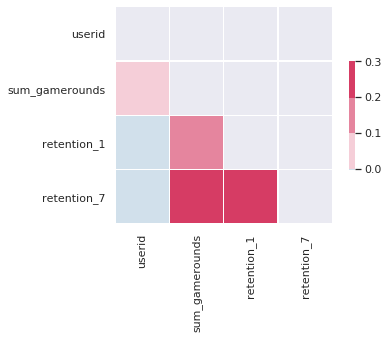

In [61]:
sns.set() #style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 2, as_cmap=False)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

The greatest positive correlation occurs between 'retention_1' and 'retention_7'.

## 5. Analyzing player behavior 
[Return to Table of Contents](#Table-of-Contents)

**A/B test:** After a player install the game, he or she was randomly assigned to either gate_30 or gate_40.

In [10]:
df['version'].value_counts()/len(df)

gate_40    0.504374
gate_30    0.495626
Name: version, dtype: float64

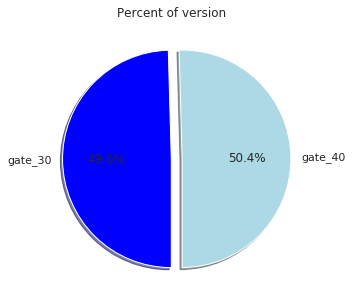

In [11]:
# Data to plot
labels = df['version'].value_counts(sort = True).index
sizes = df['version'].value_counts(sort = True)

colors = ["lightblue","blue"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 5,5

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of version')
plt.show()

There is a balance around 50% in the division of players between the control group and the test group.

In [12]:
df['retention_1'].value_counts()/len(df)

False    0.55479
True     0.44521
Name: retention_1, dtype: float64

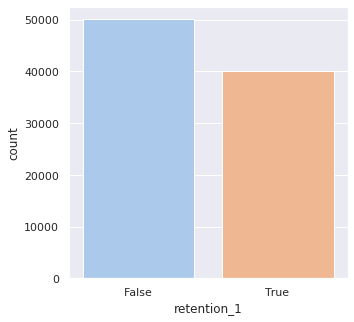

In [43]:
sns.set(style="darkgrid")
ax = sns.countplot(x="retention_1", palette="pastel", data=df)

44% of users played 1 day after installing.

In [13]:
df['retention_7'].value_counts()/len(df)

False    0.813935
True     0.186065
Name: retention_7, dtype: float64

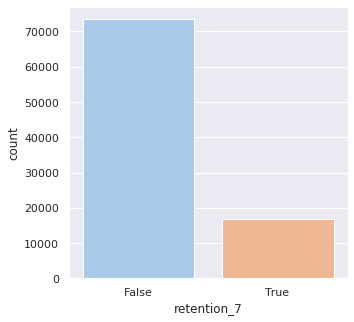

In [42]:
sns.set(style="darkgrid")
ax = sns.countplot(x="retention_7", palette="pastel", data=df)

18% of users played 7 days after installing.

In [28]:
grouped_retention_1 = df.groupby('version').agg({'retention_1': ['mean', 'median', mode, 'std']})

print(grouped_retention_1)

        retention_1                        
               mean median   mode       std
version                                    
gate_30    0.448188  False  False  0.497314
gate_40    0.442283  False  False  0.496663


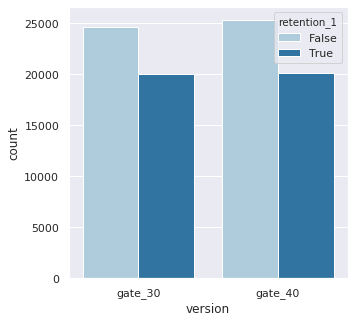

In [55]:
ax = sns.countplot(x="version", hue="retention_1", palette="Paired", data=df)

44% of users who played 1 day after installing the game returned regardless of the level at which the gate was placed.

In [15]:
grouped_retention_7 = df.groupby('version').agg({'retention_7': ['mean', 'median', mode, 'std']})

print(grouped_retention_7)

        retention_7                        
               mean median   mode       std
version                                    
gate_30    0.190201  False  False  0.392464
gate_40    0.182000  False  False  0.385849


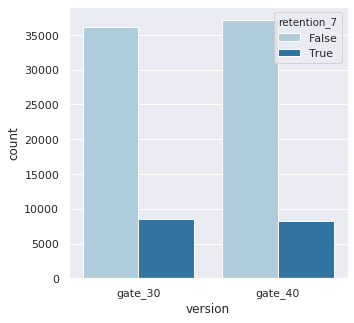

In [54]:
ax = sns.countplot(x="version", hue="retention_7", palette="Paired", data=df)

About 18% of users who continued to play after 7 days of installing the game returned regardless of the level at which the gate was placed.

In [16]:
grouped_sum_gamerounds = df.groupby('version').agg({'sum_gamerounds': ['mean', 'median', mode, 'std']})

print(grouped_sum_gamerounds)

        sum_gamerounds                        
                  mean median mode         std
version                                       
gate_30      52.456264     17    1  256.716423
gate_40      51.298776     16    1  103.294416


On average 52 game rounds were played by the users during the first 14 days after install regardless the gate location. But the standard deviation showed a high value in relation to the average, indicating the presence of outliers.

The median is a safer value and less subject to the influence of outliers. Thus, 50% of players completed 17 rounds in a period of 14 days after installing the game.

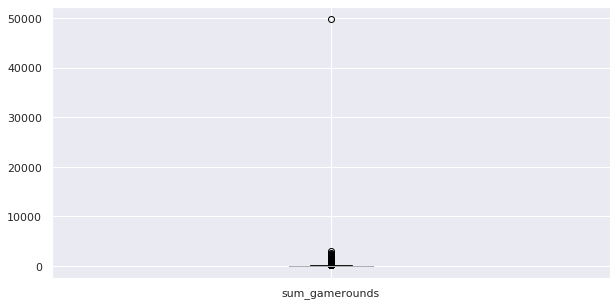

In [17]:
# Check outliers
df.boxplot(column='sum_gamerounds', figsize=(10, 5))

Outliers must be removed from the dataset to decrease the influence on the mean of the variable _sum_gamerounds_.

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [18]:
# Calculate zscore on 'sum_gamerounds'
z = np.abs(stats.zscore(df['sum_gamerounds']))
print(z)

[0.25056402 0.07112265 0.5799932  ... 0.12239161 0.004473   0.18391437]


In [19]:
# Define a limit(std) and identify values above the limit
threshold = 3
# z[row]
#print(np.where(z > threshold))

In [63]:
# Exclude outliers and create new dataset
new_df = df[(z < threshold)]

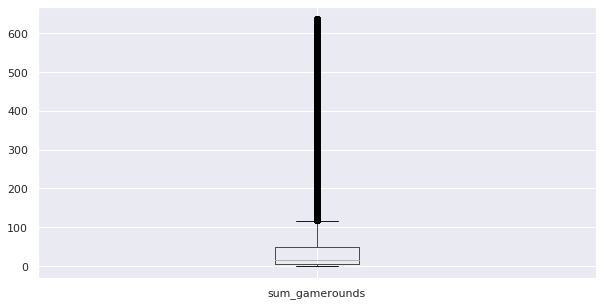

In [64]:
# Boxplot after withdrawal of outliers
new_df.boxplot(column='sum_gamerounds', figsize=(10, 5))

In [22]:
print('The size difference between the datasets is', len(df) - len(new_df), 'rows.')

The size difference between the datasets is 425 rows.


In [23]:
grouped_sum_gamerounds_new = new_df.groupby('version').agg({'sum_gamerounds': ['mean', 'median', mode, 'std']})

print(grouped_sum_gamerounds_new)

        sum_gamerounds                       
                  mean median mode        std
version                                      
gate_30      47.486494     17    1  81.340691
gate_40      46.951706     16    1  79.976331


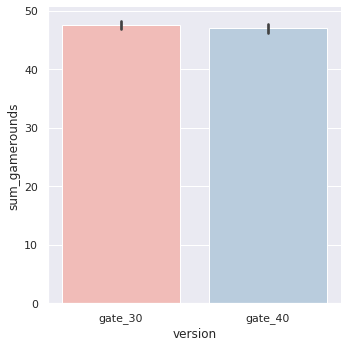

In [24]:
g = sns.catplot(y = "sum_gamerounds", x = "version", data = new_df, kind = "bar", palette = "Pastel1")

After removing the outliers, the average number of rounds in the 14-day period is 47 - the difference between the two versions is minimal.

## 6. Finding
[Return to Table of Contents](#Table-of-Contents)

* The number of users in the control group and the test group is around 50% each and occurred at random. Therefore, a comparison between the two groups is feasible.
* Regardless of the group to which the user had been allocated, on the first day after installing the game, only 44% of users played. On the seventh day, that figure was 18%.
* The variable _sum_gamerouns_ (the number of game rounds played by the player during the first 14 days after install) presented discrepant values and needed to be addressed. After removing these values, the average number of rounds played by users was 47. But the median shows better the behavior of the 50% central users: 17 rounds.
* It is concluded that the different versions of the app did not influence the retention of users to the app. It is necessary to carry out further research to assess in which period of use and stage of the game the retention begins to decrease.

![CatUrl](https://media.giphy.com/media/kDYbWPDmL5dfgEjZko/giphy.gif)